In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2020_down1/2020_down1_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_down1/2020_down1_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_down1/2020_down1_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2020_down1/2020_down1_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
#print(text)



In [3]:
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

12093

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

12093


In [26]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [27]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.004*"seng" + 0.004*"satisfaction" + 0.004*"assetlight" + 0.004*"overdue" + 0.004*"kraneshares" + 0.004*"tcom" + 0.004*"indonesia" + 0.004*"greco"')
(1, '0.000*"alimpiev" + 0.000*"franco" + 0.000*"pacifico" + 0.000*"agencia" + 0.000*"sever" + 0.000*"innogación" + 0.000*"vladislav" + 0.000*"deepen"')
(2, '0.000*"deltec" + 0.000*"eightmonth" + 0.000*"testbed" + 0.000*"millennial" + 0.000*"physic" + 0.000*"rtrmdgfxfr__be" + 0.000*"giacomo" + 0.000*"hijack"')
(3, '0.000*"biden" + 0.000*"dovish" + 0.000*"cloudbased" + 0.000*"underground" + 0.000*"shame" + 0.000*"kabucom" + 0.000*"classroom" + 0.000*"eurekahedge"')


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
sentences = article_contents

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

12093

In [33]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [35]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [36]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [37]:
temp_cluster_result['cluster'] = assigned_clusters

In [38]:
temp_cluster_result['raw_data'] = X.tolist()

In [39]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [40]:
from sklearn.metrics import pairwise_distances

In [41]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [42]:
len(cosine_centroid_list)

12093

In [43]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [44]:
sum(temp_distance[3])

306.90305979099145

In [45]:
import scipy.spatial.distance as dist

In [46]:
dist.cosine(X[0],cosine_centroid_list[0])

0.005990829893443017

In [47]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.28656726246160663

In [48]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [49]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
198,"[-0.8825560212135315, 0.4722035825252533, 0.82...",company,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.018108,0.095607,0.922500,NaN
346,"[-0.7327327132225037, 0.4458250105381012, 0.83...",user,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.004159,0.081506,0.922652,NaN
435,"[-0.9079293608665466, 0.3579590618610382, 1.51...",digital,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.072251,0.148292,0.923958,NaN
292,"[-0.7784069776535034, 0.474775105714798, 0.849...",work,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.006067,0.071124,0.934942,NaN
423,"[-1.039057731628418, 0.5735517144203186, 0.988...",blockchain,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.142140,0.197723,0.944417,NaN
438,"[-1.2455551624298096, 0.4635521173477173, 1.17...",cryptocurrencies,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.027019,0.079647,0.947372,NaN
233,"[-0.807131290435791, 0.4598407745361328, 0.867...",include,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.010926,0.059813,0.951113,NaN
36,"[-0.8527980446815491, 0.45872727036476135, 0.9...",system,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.016289,0.064771,0.951518,NaN
134,"[-0.8296007513999939, 0.45449501276016235, 0.8...",service,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.005643,0.053305,0.952339,NaN
3279,"[-0.8092769384384155, 0.4051544964313507, 0.81...",token,0,"[-0.05028948, 0.031082762, 0.06561907, -0.0784...",0.008802,0.054389,0.954412,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
8,"[-1.0091232061386108, 0.38829120993614197, 0.6...",bitcoin,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.051519,0.423338,0.628181,NaN
48,"[-0.8721808195114136, 0.4220414459705353, 0.49...",market,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.061044,0.242970,0.818075,NaN
136,"[-0.8053339123725891, 0.4475104808807373, 0.56...",time,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.017177,0.135121,0.882056,NaN
524,"[-0.9682368040084839, 0.4022179841995239, 0.62...",trade,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.030753,0.134346,0.896407,NaN
43,"[-0.7574127912521362, 0.5317801833152771, 0.42...",price,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.093100,0.179283,0.913817,NaN
568,"[-0.5960921049118042, 0.46230441331863403, 0.5...",support,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.009970,0.069420,0.940550,NaN
647,"[-0.7568812966346741, 0.4179786145687103, 0.64...",take,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.019570,0.077942,0.941628,NaN
21,"[-0.7580279111862183, 0.45890578627586365, 0.6...",come,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.009736,0.067096,0.942640,NaN
23,"[-0.8059641718864441, 0.4689358174800873, 0.48...",year,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.019550,0.075308,0.944242,NaN
637,"[-0.6100843548774719, 0.4456633925437927, 0.60...",coronavirus,1,"[-0.06457987, 0.047210686, 0.06074418, -0.0976...",0.018249,0.072054,0.946195,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
196,"[-0.8991119265556335, 0.4105682969093323, 0.70...",crypto,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.037446,0.170761,0.866685,NaN
32,"[-0.8111254572868347, 0.4454302191734314, 0.74...",make,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.012110,0.107539,0.904571,NaN
481,"[-0.8401737809181213, 0.41092607378959656, 0.6...",exchange,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.032254,0.115752,0.916502,NaN
42,"[-0.9470642805099487, 0.4109119772911072, 0.70...",cryptocurrency,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.038686,0.104750,0.933937,NaN
138,"[-0.9443895220756531, 0.4508720338344574, 0.78...",people,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.037450,0.100101,0.937349,NaN
642,"[-0.5854195952415466, 0.4375460743904114, 0.68...",data,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.013608,0.067715,0.945892,NaN
334,"[-0.8269475698471069, 0.43251171708106995, 0.7...",need,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.023636,0.070660,0.952977,NaN
175,"[-0.6898525357246399, 0.45755964517593384, 0.6...",network,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.007762,0.054699,0.953062,NaN
448,"[-0.5823565125465393, 0.4520938992500305, 0.64...",accord,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.010777,0.055009,0.955768,NaN
323,"[-0.7374148368835449, 0.40977704524993896, 0.6...",transaction,2,"[-0.06323167, 0.04888988, 0.07737295, -0.10432...",0.010190,0.053615,0.956575,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
427,"[-0.07002457976341248, 0.8787825107574463, 0.9...",strive,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.006156,0.035020,0.971136,NaN
429,"[0.3197683095932007, 0.8119208216667175, 0.937...",journalistic,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.011731,0.034555,0.977176,NaN
426,"[-0.25189971923828125, 0.9039920568466187, 0.8...",outlet,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.020450,0.037964,0.982486,NaN
2201,"[-0.0510554276406765, 0.41855427622795105, 0.3...",podcast,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.006815,0.017665,0.989151,NaN
430,"[0.6143904328346252, 0.7503143548965454, 1.065...",standard,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.043997,0.048036,0.995961,NaN
425,"[-0.3516455888748169, 0.848679780960083, 0.694...",medium,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.049248,0.051755,0.997493,NaN
1469,"[-0.2506886422634125, 0.46419525146484375, 0.4...",social,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.017646,0.020144,0.997502,NaN
424,"[-0.382638156414032, 0.7691500186920166, 0.682...",news,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.053142,0.054234,0.998908,NaN
2205,"[-0.059994421899318695, 0.17362521588802338, 0...",radiopublica,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.004691,0.004959,0.999733,NaN
2204,"[-0.030010435730218887, 0.17565405368804932, 0...",castbox,3,"[-0.003587586, 0.036773987, 0.041970473, -0.04...",0.007005,0.004959,1.002046,NaN


In [54]:
y_km = temp_cluster_result['cluster'].values

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

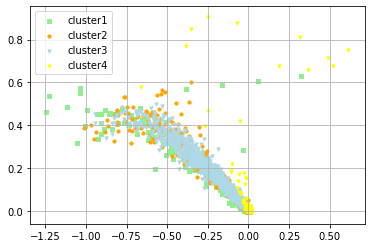

In [56]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈

1690

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 이슈

2187

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소

7834

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 인플

382

In [61]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==7,'label'] = 2 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 #  이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 12 # 거래소
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 6 # 인플

In [62]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [64]:
kmeans.inertia_

2687.006718739648

In [65]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 2 0 ... 0 0 0]


In [66]:
cluster_values= list(model.wv.vocab)

In [67]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-2687.0068


In [68]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [69]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.7115837


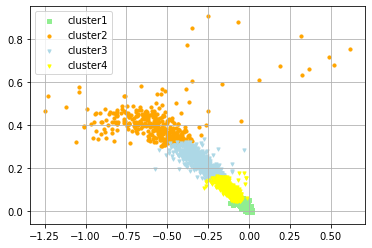

In [70]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [71]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [72]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [73]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [74]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [75]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [76]:
import scipy.spatial.distance as dist

In [77]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [78]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [79]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 사회적 이슈 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
11475,"[-0.01306753046810627, 0.011841700412333012, 0...",netmarble,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.027202,0.000155,1.027047,NaN
8665,"[-0.018101684749126434, 0.017859676852822304, ...",oecd,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.027539,0.000310,1.027229,NaN
9808,"[-0.011034419760107994, 0.009122638963162899, ...",viruscontainment,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.027448,0.000155,1.027293,NaN
12079,"[-0.020334957167506218, 0.010311330668628216, ...",coke,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.027506,0.000155,1.027352,NaN
2744,"[-0.01576821692287922, 0.010206269100308418, 0...",speakerthe,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.027947,0.000310,1.027637,NaN
7054,"[-0.020091626793146133, 0.01175613235682249, 0...",disgrace,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.028026,0.000155,1.027871,NaN
10299,"[-0.017750948667526245, 0.015945453196763992, ...",barista,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.028158,0.000155,1.028003,NaN
10584,"[-0.016574859619140625, 0.008568499237298965, ...",soumyadeb,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.028229,0.000155,1.028074,NaN
5916,"[-0.014123091474175453, 0.012390637770295143, ...",checker,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.028260,0.000155,1.028106,NaN
3757,"[-0.014962791465222836, 0.014015289023518562, ...",tamuka,0,"[-0.01727647, 0.013830226, 0.02176797, -0.0296...",0.028391,0.000155,1.028236,NaN


In [80]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
895,"[-0.5685010552406311, 0.3964623808860779, 0.62...",face,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.188706,0.019679,1.169027,NaN
2306,"[-0.5740265846252441, 0.4037911593914032, 0.60...",contract,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.224445,0.022933,1.201512,NaN
501,"[-0.6143465638160706, 0.40797775983810425, 0.6...",example,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.280779,0.024483,1.256296,NaN
627,"[-0.5693010091781616, 0.40253955125808716, 0.6...",view,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.287335,0.023088,1.264247,NaN
105,"[-0.5043483972549438, 0.4065425992012024, 0.61...",explain,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.304725,0.018440,1.286285,NaN
320,"[-0.5251699686050415, 0.40109962224960327, 0.5...",attack,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.314263,0.019524,1.294739,NaN
130,"[-0.5730615258216858, 0.38696053624153137, 0.5...",power,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.326021,0.023243,1.302778,NaN
111,"[-0.530005931854248, 0.41885870695114136, 0.60...",write,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.342869,0.027272,1.315597,NaN
741,"[-0.6071285009384155, 0.3904951214790344, 0.58...",thing,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.381205,0.023708,1.357497,NaN
2562,"[-0.5817721486091614, 0.4087175130844116, 0.66...",right,1,"[-0.56638455, 0.4033579, 0.633046, -0.8599621,...",0.388109,0.023088,1.365021,NaN


In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
328,"[-0.30099043250083923, 0.22782215476036072, 0....",word,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.100863,0.006973,1.093890,NaN
1,"[-0.28524070978164673, 0.21735461056232452, 0....",sound,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.106493,0.006663,1.099830,NaN
551,"[-0.2832615077495575, 0.21477581560611725, 0.3...",condition,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.110276,0.007128,1.103148,NaN
30,"[-0.27830758690834045, 0.2170756459236145, 0.3...",refer,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.119141,0.006353,1.112788,NaN
3912,"[-0.2899629473686218, 0.21815432608127594, 0.3...",original,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.127033,0.006973,1.120060,NaN
718,"[-0.304531991481781, 0.2098584920167923, 0.356...",steal,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.130954,0.006818,1.124136,NaN
1116,"[-0.30163905024528503, 0.22536325454711914, 0....",person,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.145231,0.008987,1.136244,NaN
713,"[-0.2764213979244232, 0.2159830778837204, 0.32...",victim,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.148813,0.008523,1.140290,NaN
3775,"[-0.2717839777469635, 0.22755350172519684, 0.3...",telegram,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.147998,0.007283,1.140715,NaN
2247,"[-0.2838744521141052, 0.21907860040664673, 0.3...",book,2,"[-0.28650475, 0.21891023, 0.3421239, -0.468692...",0.149796,0.006818,1.142978,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(30,'score') # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
874,"[-0.11064770817756653, 0.08721736073493958, 0....",suspect,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.038584,0.001859,1.036725,NaN
912,"[-0.10689926892518997, 0.08907858282327652, 0....",none,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.044609,0.002944,1.041665,NaN
4345,"[-0.11956165730953217, 0.09384258836507797, 0....",bankruptcy,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.045446,0.002634,1.042812,NaN
2258,"[-0.10453952848911285, 0.09049367159605026, 0....",disaster,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.050753,0.002014,1.048738,NaN
4111,"[-0.12353672832250595, 0.0970505028963089, 0.1...",limitation,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.051080,0.001859,1.049220,NaN
5655,"[-0.11706962436437607, 0.08654143661260605, 0....",input,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.052548,0.002479,1.050068,NaN
814,"[-0.1209261417388916, 0.08358555287122726, 0.1...",dynamic,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.052996,0.002169,1.050827,NaN
68,"[-0.11085885763168335, 0.09547241032123566, 0....",component,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.053136,0.002014,1.051122,NaN
5723,"[-0.10574161261320114, 0.09369108080863953, 0....",reasonable,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.053819,0.002169,1.051649,NaN
4681,"[-0.10275745391845703, 0.08932055532932281, 0....",defense,3,"[-0.1122248, 0.08954767, 0.13943878, -0.191322...",0.054666,0.001705,1.052962,NaN


In [83]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #사회적 이슈

9636

In [84]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #부정

377

In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #부정

627

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #부정

1453

In [87]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 2 # 부정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 2 # 부정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 2 # 부정

In [88]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.7115837
temp_cluster_result['Silhouette'] = 0.7115837

In [89]:
temp_cluster_result1.to_csv("../cluster/en_news/2020_down1/en_news_2020_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2020_down1/en_news_2020_down1_cosine.csv")

In [88]:
word_vectors = model.wv

In [89]:
vocabs = word_vectors.vocab.keys()

In [90]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [91]:
print(word_vectors.similarity(w1='little',w2='push'))

0.95787585


In [92]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [93]:
xys

array([[-0.26709191,  0.01406881],
       [ 2.0919719 ,  0.03097875],
       [-0.23377647, -0.01778022],
       ...,
       [-0.51360786,  0.01641949],
       [-0.48803444,  0.00649237],
       [-0.43142623,  0.00800493]])

In [94]:
xys[:,0]

array([-0.26709191,  2.0919719 , -0.23377647, ..., -0.51360786,
       -0.48803444, -0.43142623])

In [95]:
xys[:,1]

array([ 0.01406881,  0.03097875, -0.01778022, ...,  0.01641949,
        0.00649237,  0.00800493])

In [96]:
xs = xys[:,0]
ys = xys[:,1]

In [97]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0, flags=flags)


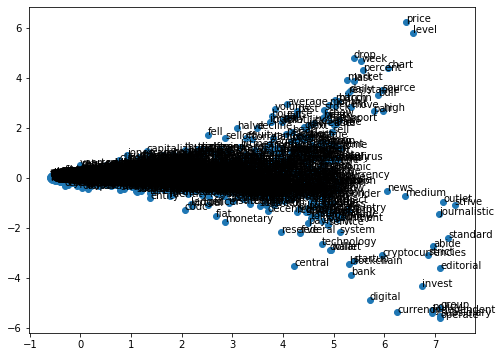

In [98]:
plot_2d_graph(vocabs,xs,ys)

In [99]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>